In [1]:
import os
os.chdir("../..")

In [2]:
from shell.datasets.datasets import MNIST, FashionMNIST, KMNIST, CIFAR100
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch
from shell.utils.utils import seed_everything

seed_everything(0)

In [3]:
num_train = 64
dataCls = [MNIST, FashionMNIST, KMNIST, CIFAR100]
datasets = [cls(num_train_per_task=num_train, use_contrastive=True) for cls in dataCls]

In [4]:
datasets[0].trainset[0].transform

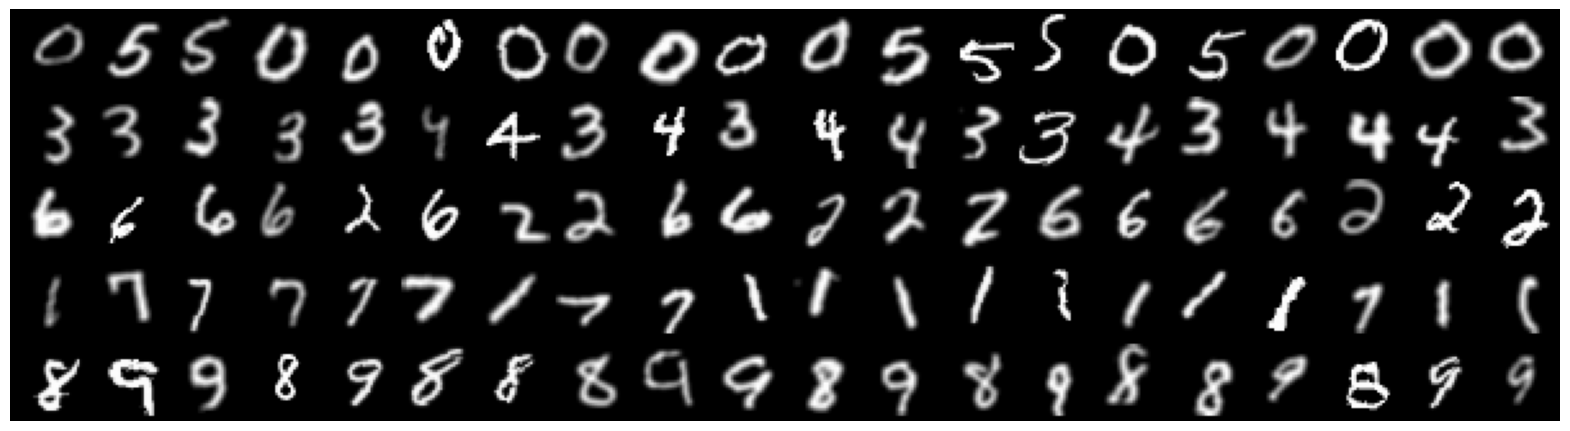

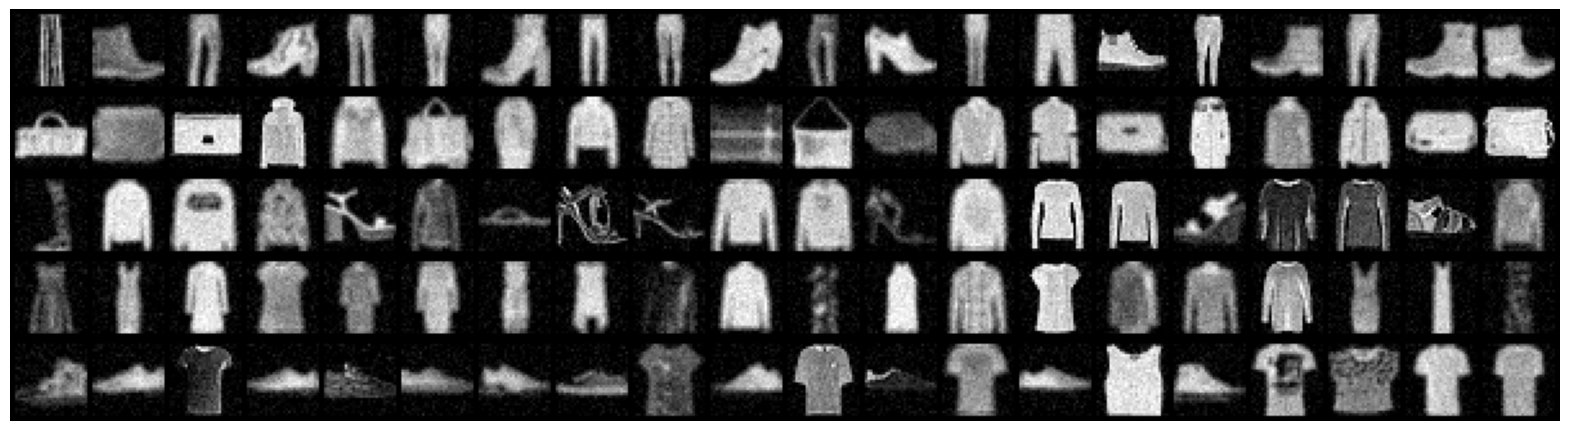

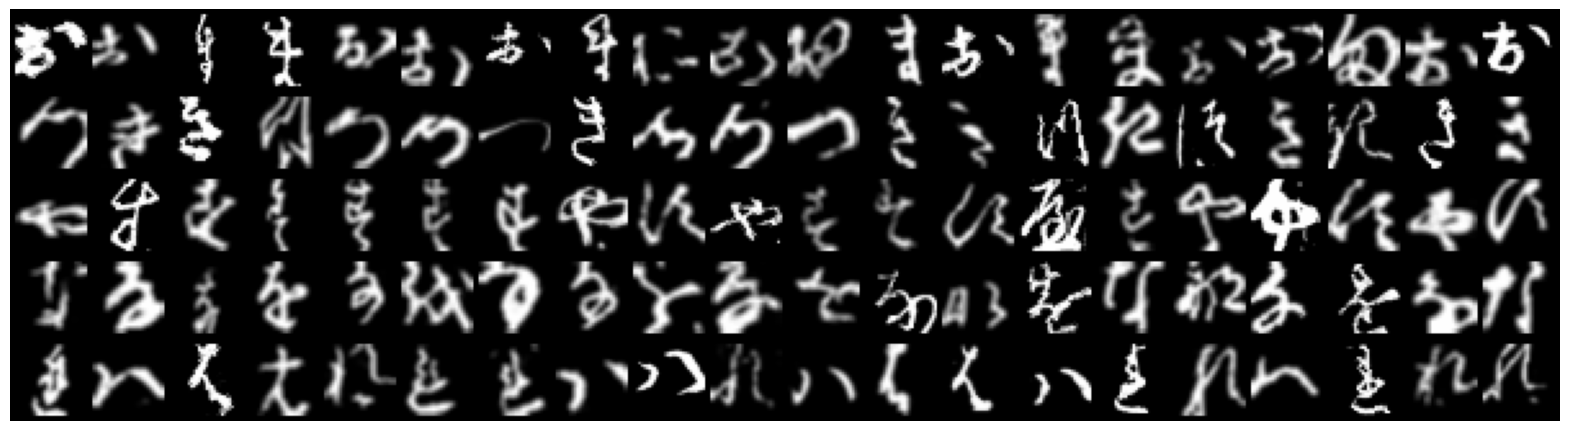

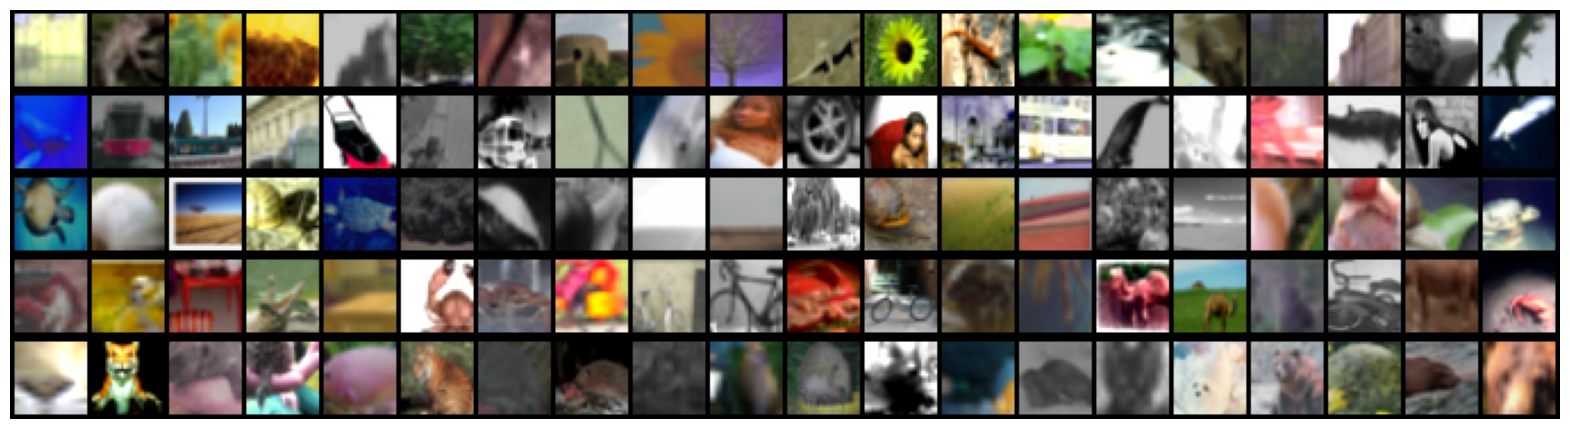

In [5]:
for dataset in datasets:
    # num_tasks = len(dataset.trainset)
    num_tasks = 5
    # n_images_per_task = 20 if dataset.name == "cifar100" else 10
    n_images_per_task = 20
    X_tasks = []
    for task in range(num_tasks):
        task_dataset = dataset.trainset[task]
        # X = task_dataset.tensors[0]
        X = torch.stack([x[0][1] for x in task_dataset]) # each x is a tuple of ([img, contrastive_img], label)
        X = X[:n_images_per_task]
        X_task = make_grid(X, nrow=n_images_per_task)
        X_tasks.append(X_task)

    X = torch.cat(X_tasks, dim=1)

    plt.figure(figsize=(20, 8))
    plt.imshow(X.permute(1, 2, 0))
    plt.axis("off")
    # save image at Figures/datasets/dataset.name_aug.pdf
    plt.savefig(f"Figures/datasets/{dataset.name}_aug.pdf", bbox_inches="tight")
